# **EN3150 Assignment 03: Simple convolutional neural network to perform classification.**

> Dr Sampath K. Perera

> October 1, 2024


Team:

* Gallella MMHHB - 210174X
* Amarasinghe AAWLR - 210031H
* Herath HMSI - 210218M
* Abeyrathna SMSMB - 210005H

# 1 CNN for image classification

## 1. Set up the environment and packages

In [ ]:
import torch
print(torch.cuda.device_count())
print(torch.cuda.get_device_name(0))

1
NVIDIA GeForce RTX 2060


In [ ]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
BATCH_SIZE = 32
print(device)

cuda


In [ ]:
%cd "C:"

C:\


In [ ]:
%cd "AAA My Int"

C:\AAA My Int


In [ ]:
! dir

 Volume in drive C is OS
 Volume Serial Number is 229E-B7D3

 Directory of C:\AAA My Int

12/12/2024  10:59 am    <DIR>          .
30/11/2024  11:25 pm    <DIR>          DSP kuppi
28/11/2024  07:42 pm    <DIR>          EM kuppi
12/12/2024  11:00 am    <DIR>          RealWaste
11/11/2024  11:04 pm    <DIR>          Reserves
01/11/2024  09:43 pm     2,237,808,093 The.Wild.Robot.2024.1080p.10bit.WEBRip.6CH.x265.HEVC-PSA.mkv
               1 File(s)  2,237,808,093 bytes
               5 Dir(s)  279,520,030,720 bytes free


Packages:

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
# from torchinfo import summary
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from torchvision.datasets import ImageFolder
import random
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

## 2. Preparing the dataset:

Here we choos;

RealWaste Data set from UCI repo

https://archive.ics.uci.edu/dataset/908/realwaste

In [ ]:
full_dataset = ImageFolder(root="RealWaste", transform=transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor()
]))
print(f'Classess {full_dataset.classes}')
print(f'Amount of images; {len(full_dataset)}')

Classess ['Cardboard', 'Food Organics', 'Glass', 'Metal', 'Miscellaneous Trash', 'Paper', 'Plastic', 'Textile Trash', 'Vegetation']
Amount of images; 4752


## 3. Split the dataset into training, validation, and testing subsets using a ratio of 60% for training and 20% each for validation and testing sets

In [ ]:
train_dataset, valid_dataset, test_dataset = torch.utils.data.random_split(full_dataset, [int(len(full_dataset) * 0.6),
                                                                                          int(len(full_dataset) * 0.2),
                                                                                          len(full_dataset) - int(len(full_dataset) * 0.6) - int(len(full_dataset) * 0.2)])
print("Train :",len(train_dataset), ", Validation :",len(valid_dataset),", Test :", len(test_dataset))

test_targets = [test_dataset.dataset.targets[i] for i in test_dataset.indices]

Train : 2851 , Validation : 950 , Test : 951


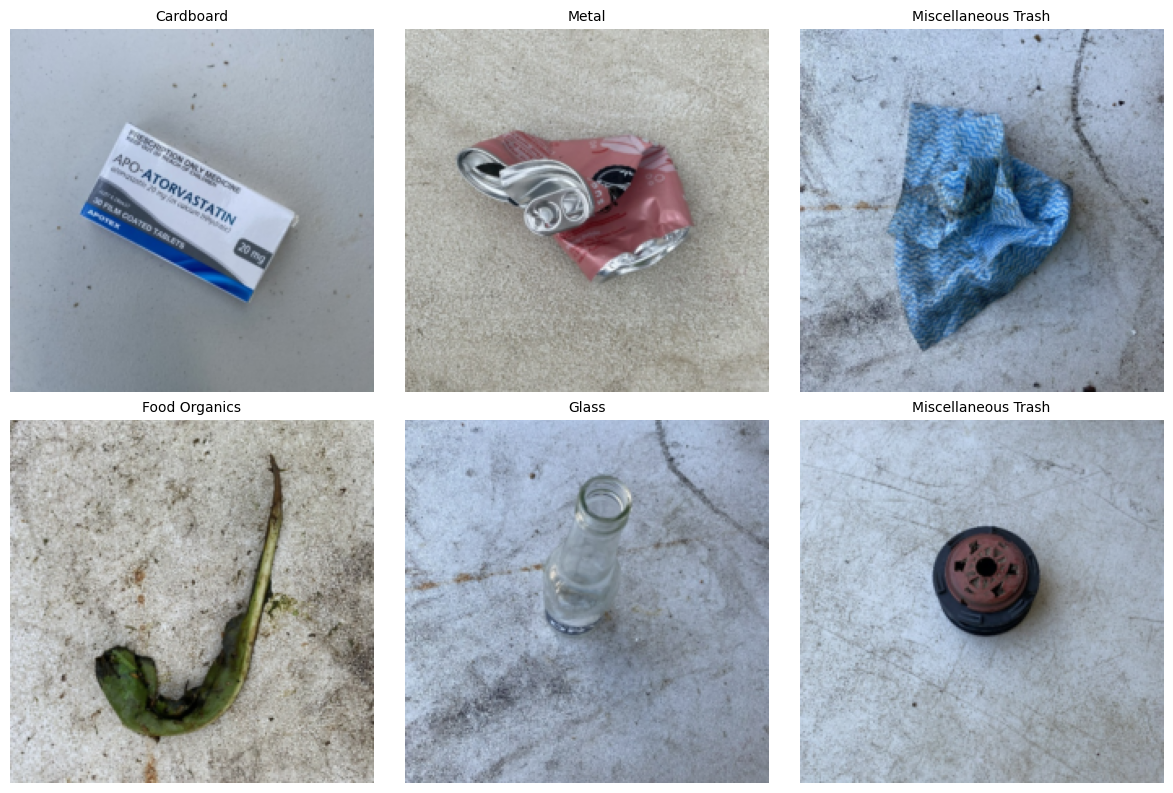

In [ ]:
import random
import matplotlib.pyplot as plt

class_names = ['Cardboard', 'Food Organics', 'Glass', 'Metal', 'Miscellaneous Trash', 'Paper', 'Plastic', 'Textile Trash', 'Vegetation']

# Define the number of rows and columns
nrows = 2
ncols = 3
num_images = nrows * ncols

random_indices = random.sample(range(len(train_dataset)), num_images)
fig, axs = plt.subplots(nrows, ncols, figsize=(12, 8))

for i, idx in enumerate(random_indices):
    img, label = train_dataset[idx]
    ax = axs[i // ncols, i % ncols]
    ax.imshow(img.permute(1, 2, 0))
    ax.axis("off")
    ax.set_title(class_names[label], fontsize=10)

plt.tight_layout()
plt.show()

One image with the final resolution;

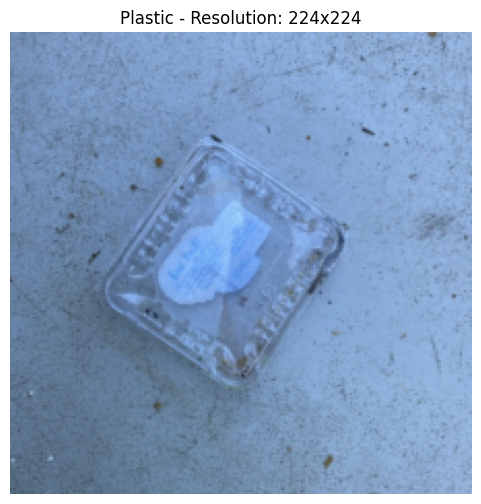

In [ ]:
class_names = ['Cardboard', 'Food Organics', 'Glass', 'Metal', 'Miscellaneous Trash', 'Paper', 'Plastic', 'Textile Trash', 'Vegetation']

# Get one image and its label
img, label = train_dataset[0]

# Get image resolution
resolution = img.shape[1], img.shape[2]

plt.figure(figsize=(6, 6))
plt.imshow(img.permute(1, 2, 0))
plt.title(f'{class_names[label]} - Resolution: {resolution[0]}x{resolution[1]}')
plt.axis('off')
plt.show()

## 4. Build the CNN model, training and evaluation with test set

Starting script...
Model Summary:
CNNModel(
  (features): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=100352, out_features=256, bias=True)
    (2): ReLU()
    (3): Linear(in_features=256, out_features=9, bias=True)
  )
)
Model defined and summary printed.
Data loaders prepared.
Loss function and optimizer set.
Starting training...
Epoch [1/20] - Validation accuracy improved to 34.63%, model saved.
Epoc

C:\Users\hbgal\AppData\Local\Temp\ipykernel_4336\1246123819.py:135: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pth'))


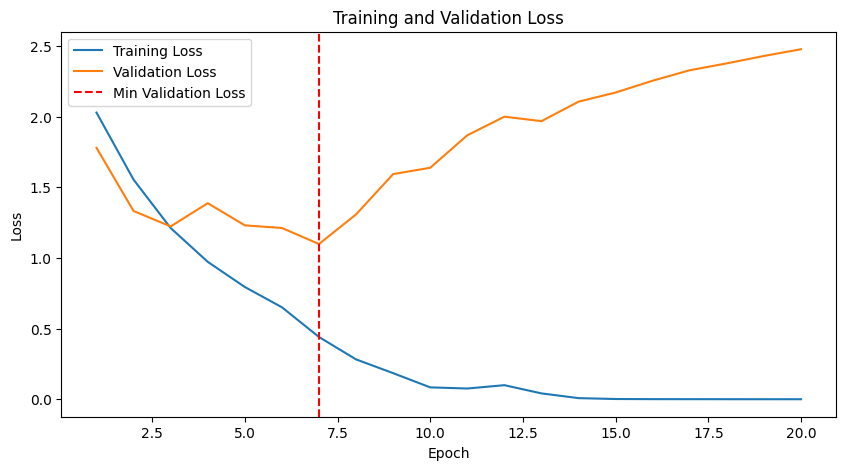

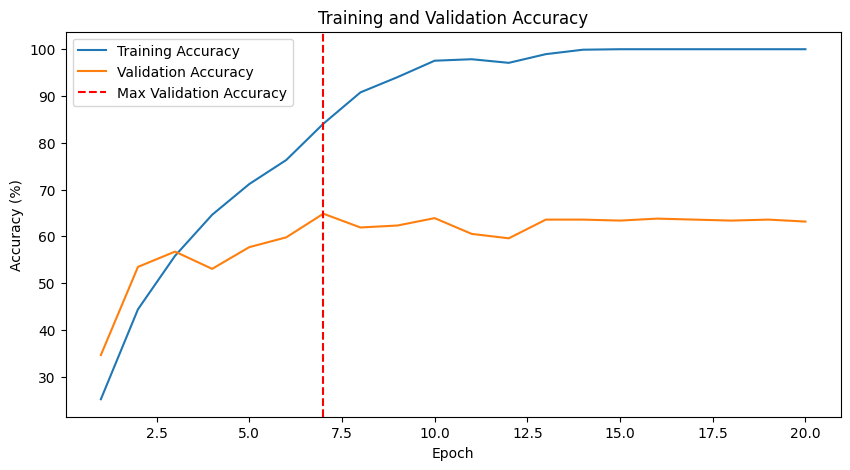

Evaluating on test data...
Test Accuracy: 63.62%
Plotting confusion matrix...


<Figure size 1000x1000 with 0 Axes>

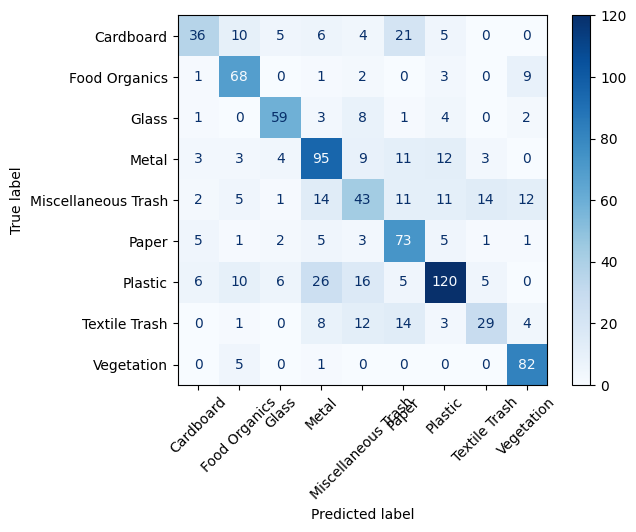

Precision: 0.64
Recall: 0.64
Script completed.


In [ ]:
print("Starting script...")

# Define the CNN model
class CNNModel(nn.Module):
    def __init__(self, num_classes=9):
        super(CNNModel, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 28 * 28, 256),
            nn.ReLU(),
            nn.Linear(256, num_classes),
        )
    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

# Initialize the model
num_classes = 9
model = CNNModel(num_classes=num_classes)

# Print model summary
print("Model Summary:")
print(model)

print("Model defined and summary printed.")

# Prepare data loaders
batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

print("Data loaders prepared.")

# Use GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Set up loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

print("Loss function and optimizer set.")

# Training the model
num_epochs = 20
train_losses = []
valid_losses = []
train_accuracies = []
valid_accuracies = []

best_valid_acc = 0.0
best_model_wts = None

print("Starting training...")

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_accuracy = 100 * correct_train / total_train
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    # Validation
    model.eval()
    running_loss = 0.0
    correct_valid = 0
    total_valid = 0
    with torch.no_grad():
        for images, labels in valid_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total_valid += labels.size(0)
            correct_valid += (predicted == labels).sum().item()

    valid_loss = running_loss / len(valid_loader)
    valid_accuracy = 100 * correct_valid / total_valid
    valid_losses.append(valid_loss)
    valid_accuracies.append(valid_accuracy)

    # Save the model if validation accuracy is improved
    if valid_accuracy > best_valid_acc:
        best_valid_acc = valid_accuracy
        best_model_wts = model.state_dict().copy()
        torch.save(best_model_wts, 'best_model.pth')
        print(f'Epoch [{epoch+1}/{num_epochs}] - Validation accuracy improved to {best_valid_acc:.2f}%, model saved.')
    else:
        print(f'Epoch [{epoch+1}/{num_epochs}] - Validation accuracy did not improve.')

    print(f'Epoch [{epoch+1}/{num_epochs}] completed.')

print("Training completed.")

# Load the best model weights
model.load_state_dict(torch.load('best_model.pth'))
print("Best model loaded for testing.")

# Plot training and validation losses
plt.figure(figsize=(10,5))
plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs+1), valid_losses, label='Validation Loss')
min_valid_loss_epoch = np.argmin(valid_losses)+1
plt.axvline(min_valid_loss_epoch, linestyle='--', color='r', label='Min Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracies
plt.figure(figsize=(10,5))
plt.plot(range(1, num_epochs+1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, num_epochs+1), valid_accuracies, label='Validation Accuracy')
max_valid_acc_epoch = np.argmax(valid_accuracies)+1
plt.axvline(max_valid_acc_epoch, linestyle='--', color='r', label='Max Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()

# Evaluate the model on test data
print("Evaluating on test data...")
model.eval()
correct_test = 0
total_test = 0
all_preds = []
all_labels = []
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()

        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

test_accuracy = 100 * correct_test / total_test
print(f'Test Accuracy: {test_accuracy:.2f}%')

# Confusion Matrix
class_names = ['Cardboard', 'Food Organics', 'Glass', 'Metal', 'Miscellaneous Trash', 'Paper', 'Plastic', 'Textile Trash', 'Vegetation']

cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
print("Plotting confusion matrix...")
plt.figure(figsize=(10,10))
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=45)
plt.show()

# Calculate precision and recall
precision = precision_score(all_labels, all_preds, average='weighted')
recall = recall_score(all_labels, all_preds, average='weighted')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

print("Script completed.")


5. **Network Parameters**:
   - Activation Functions: ReLU
   - Kernel Sizes: 3x3
   - Filter Sizes: 32, 64, 128
   - Size of Fully Connected Layer: 256
   - Dropout Rate: Not used

6. **Justification for Activation Functions**:
   - ReLU is chosen because it introduces non-linearity and helps mitigate the vanishing gradient problem in sigmoid, and is computationally efficient for this type of image based CNNs.

7. **Train the Model**:
   - The model is trained using the Adam optimizer and CrossEntropyLoss for 20 epochs. The learning rate is set to 0.001. Training and validation losses are plotted with respect to epochs.

8. **Why Adam Optimizer over SGD**:
   - Adam optimizer is chosen over SGD because it adapts the learning rate for each parameter, leading to faster convergence and better performance on complex datasets.

9. **Why Sparse Categorical Crossentropy as Loss Function**:
   - CrossEntropyLoss is suitable for multi-class classification problems as it measures the performance of a classification model whose output is a probability value between 0 and 1.

10. **Evaluate the Model**:
    - After training, the model's performance is evaluated on the test dataset. The train/test accuracy, confusion matrix, precision, and recall are recorded.

11. **Plot Training and Validation Loss for Different Learning Rates**:
    - Training and validation losses are plotted below for learning rates 0.0001, 0.001, 0.01, and 0.1. The learning rate with the best performance (lowest validation loss and highest accuracy) is with 0.0001 learning rate but it take very long time to complete a single epoch.

- For very small learning rates (e.g., 0.0001), the training is slow, and loss decreases gradually.

- For very large learning rates (e.g., 0.1), the training and validation losses might oscillate or diverge.

- A moderate learning rate (e.g., 0.001) often achieves a good balance between convergence speed and stability.

Training with learning rate: 0.0001
Training with learning rate: 0.001
Training with learning rate: 0.01
Training with learning rate: 0.1


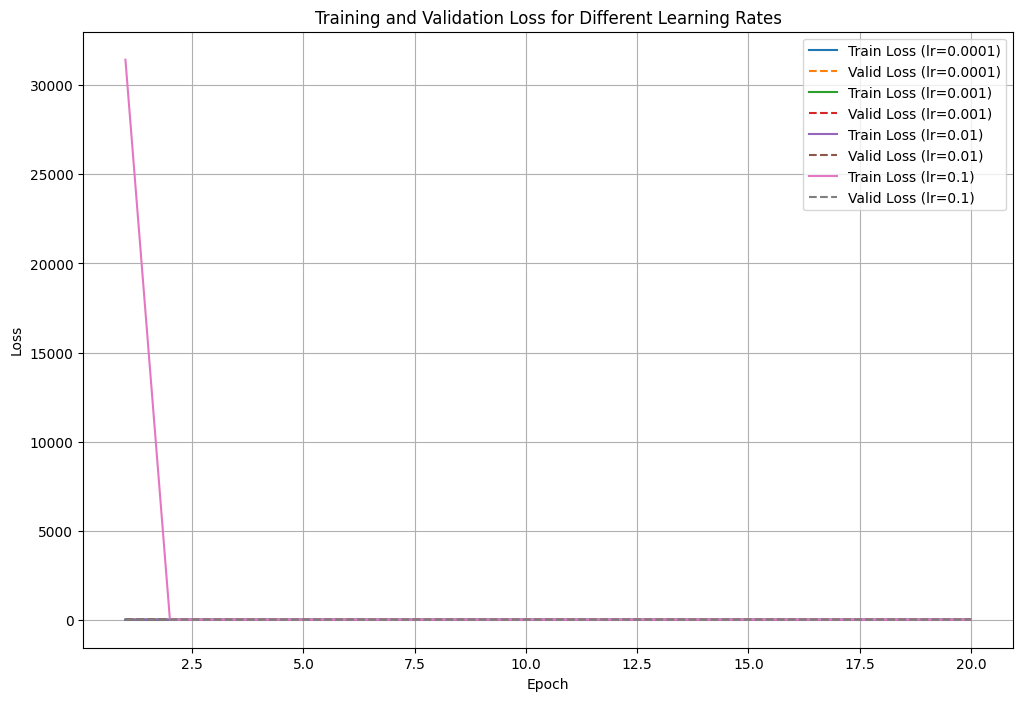

Observations:
- For very small learning rates (e.g., 0.0001), the training is slow, and loss decreases gradually.
- For very large learning rates (e.g., 0.1), the training and validation losses might oscillate or diverge.
- A moderate learning rate (e.g., 0.001) often achieves a good balance between convergence speed and stability.


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

# Define the CNN model
class CNNModel(nn.Module):
    def __init__(self, num_classes=9):
        super(CNNModel, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 28 * 28, 256),
            nn.ReLU(),
            nn.Linear(256, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

# Training function
def train_and_validate(model, train_loader, valid_loader, criterion, optimizer, num_epochs):
    train_losses = []
    valid_losses = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        train_loss = running_loss / len(train_loader)
        train_losses.append(train_loss)

        # Validation
        model.eval()
        running_loss = 0.0
        with torch.no_grad():
            for images, labels in valid_loader:
                images, labels = images.to(device), labels.to(device)

                outputs = model(images)
                loss = criterion(outputs, labels)
                running_loss += loss.item()

        valid_loss = running_loss / len(valid_loader)
        valid_losses.append(valid_loss)

    return train_losses, valid_losses

# Main script
learning_rates = [0.0001, 0.001, 0.01, 0.1]
num_epochs = 20
results = {}

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
num_classes = 9
batch_size = 32

# Placeholder for datasets (replace with actual datasets)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size)

for lr in learning_rates:
    print(f"Training with learning rate: {lr}")
    model = CNNModel(num_classes=num_classes).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    train_losses, valid_losses = train_and_validate(model, train_loader, valid_loader, criterion, optimizer, num_epochs)
    results[lr] = (train_losses, valid_losses)

# Plotting results
plt.figure(figsize=(12, 8))
for lr, (train_losses, valid_losses) in results.items():
    plt.plot(range(1, num_epochs + 1), train_losses, label=f'Train Loss (lr={lr})')
    plt.plot(range(1, num_epochs + 1), valid_losses, label=f'Valid Loss (lr={lr})', linestyle='--')

plt.title('Training and Validation Loss for Different Learning Rates')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

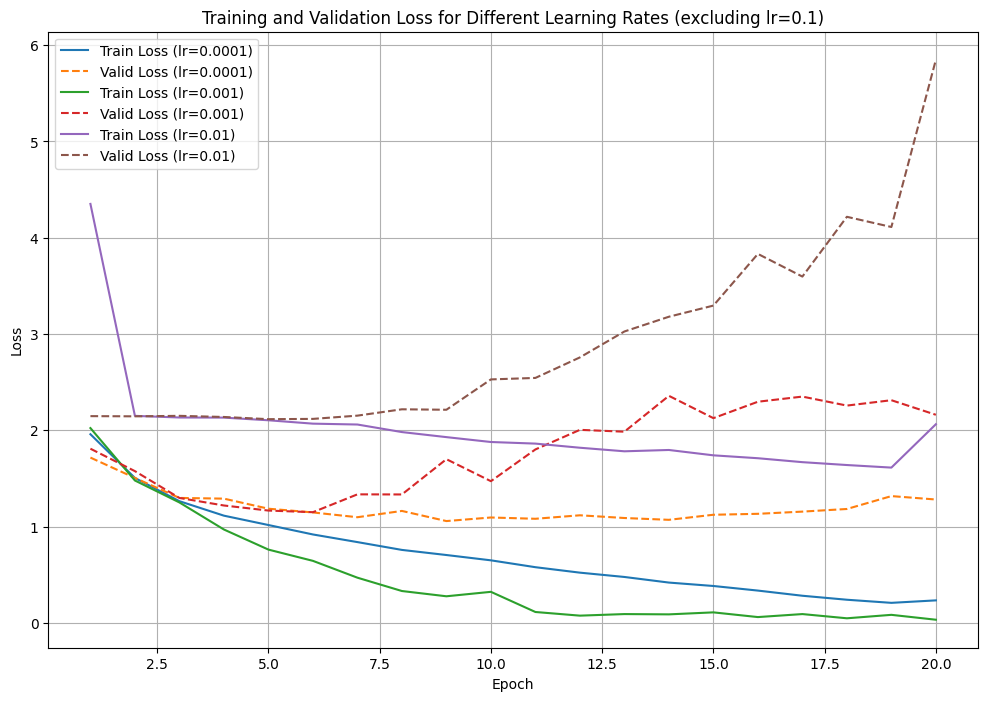

In [ ]:
# Plotting results without learning rate 0.1
plt.figure(figsize=(12, 8))
for lr, (train_losses, valid_losses) in results.items():
    if lr != 0.1:
        plt.plot(range(1, num_epochs + 1), train_losses, label=f'Train Loss (lr={lr})')
        plt.plot(range(1, num_epochs + 1), valid_losses, label=f'Valid Loss (lr={lr})', linestyle='--')

plt.title('Training and Validation Loss for Different Learning Rates (excluding lr=0.1)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

 # 2] Compare your network with state-of-the-art networks

## 1)  Fine-Tuned ResNet-50 Model based

Found 4752 files belonging to 9 classes.
Classes: ['Cardboard', 'Food Organics', 'Glass', 'Metal', 'Miscellaneous Trash', 'Paper', 'Plastic', 'Textile Trash', 'Vegetation']
Train batches: 89
Val batches: 29
Test batches: 31
Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 tf.__operators__.getitem (S  (None, 224, 224, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 224, 224, 3)      0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_7   (No

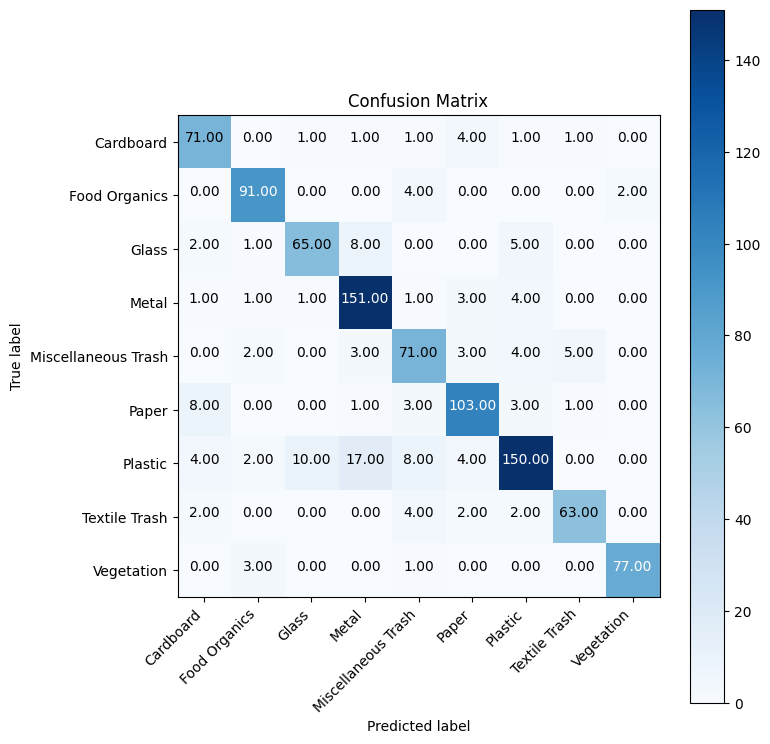

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet import preprocess_input
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import itertools

# --------------------------------------------
# Load and Split the Dataset
# --------------------------------------------
batch_size = 32
img_size = (224, 224)
data_dir = "./RealWaste"

# Load entire dataset
full_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    labels='inferred',
    label_mode='int',
    batch_size=batch_size,
    image_size=img_size,
    shuffle=True,
    seed=42
)

class_names = full_dataset.class_names
num_classes = len(class_names)
print("Classes:", class_names)

# Calculate dataset sizes
dataset_size = tf.data.experimental.cardinality(full_dataset).numpy()
train_size = int(0.6 * dataset_size)
val_size = int(0.2 * dataset_size)
test_size = dataset_size - train_size - val_size

train_ds = full_dataset.take(train_size)
remainder = full_dataset.skip(train_size)
val_ds = remainder.take(val_size)
test_ds = remainder.skip(val_size)

print("Train batches:", tf.data.experimental.cardinality(train_ds).numpy())
print("Val batches:", tf.data.experimental.cardinality(val_ds).numpy())
print("Test batches:", tf.data.experimental.cardinality(test_ds).numpy())

# Prefetch for performance
train_ds = train_ds.prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.prefetch(tf.data.AUTOTUNE)

# --------------------------------------------
# Define the Fine-Tuned SOTA Model (ResNet50)
# --------------------------------------------
def FineTunedSOTAmodel(num_classes):
    base_model = ResNet50(
        input_shape=img_size + (3,),
        include_top=False,
        weights='imagenet'
    )

    # Freeze all layers except the last 10
    for layer in base_model.layers[:-10]:
        layer.trainable = False

    inputs = tf.keras.Input(shape=img_size + (3,))
    # Preprocessing layer matching ResNet50 expectation
    x = tf.keras.applications.resnet.preprocess_input(inputs)
    x = base_model(x, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(1024, activation="relu")(x)
    x = layers.Dense(512, activation="relu")(x)
    outputs = layers.Dense(num_classes, activation="softmax")(x)

    model = tf.keras.Model(inputs, outputs)
    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model2 = FineTunedSOTAmodel(num_classes)
model2.summary()

# --------------------------------------------
# Train the Model
# --------------------------------------------
EPOCHS = 20
history = model2.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS
)

# --------------------------------------------
# Evaluate on Test Dataset
# --------------------------------------------
test_loss, test_accuracy = model2.evaluate(test_ds)
print(f"Test Accuracy of Fine-tuned ResNet50: {test_accuracy * 100:.2f}%")

# --------------------------------------------
# Confusion Matrix
# --------------------------------------------
# Get predictions on test set
y_true = []
y_pred = []
for images, labels in test_ds:
    preds = model2.predict(images)
    preds = np.argmax(preds, axis=1)
    y_true.extend(labels.numpy())
    y_pred.extend(preds)

acc_score = accuracy_score(y_true, y_pred)
print("Accuracy from predictions:", acc_score * 100, "%")

cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

# Optional: Plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, ha='right')
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

plot_confusion_matrix(cm, class_names, normalize=False, title='Confusion Matrix')
plt.show()


## 2) Fine-Tuned VGG19 Model based

Found 4752 files belonging to 9 classes.
Classes: ['Cardboard', 'Food Organics', 'Glass', 'Metal', 'Miscellaneous Trash', 'Paper', 'Plastic', 'Textile Trash', 'Vegetation']
Train batches: 89
Val batches: 29
Test batches: 31
80134624/80134624 [==============================] - 4s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.__operators__.getitem (S  (None, 224, 224, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 224, 224, 3)      0         
                                                                 
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                    

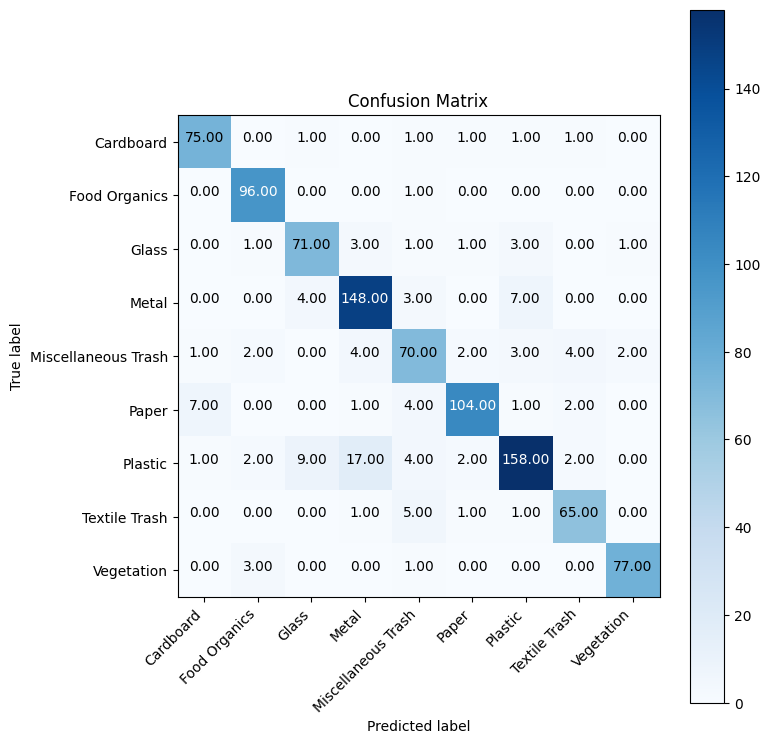

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import itertools

# --------------------------------------------
# Load and Split the Dataset
# --------------------------------------------
batch_size = 32
img_size = (224, 224)
data_dir = "./RealWaste"

# Load entire dataset
full_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    labels='inferred',
    label_mode='int',
    batch_size=batch_size,
    image_size=img_size,
    shuffle=True,
    seed=42
)

class_names = full_dataset.class_names
num_classes = len(class_names)
print("Classes:", class_names)

# Calculate dataset sizes
dataset_size = tf.data.experimental.cardinality(full_dataset).numpy()
train_size = int(0.6 * dataset_size)
val_size = int(0.2 * dataset_size)
test_size = dataset_size - train_size - val_size

train_ds = full_dataset.take(train_size)
remainder = full_dataset.skip(train_size)
val_ds = remainder.take(val_size)
test_ds = remainder.skip(val_size)

print("Train batches:", tf.data.experimental.cardinality(train_ds).numpy())
print("Val batches:", tf.data.experimental.cardinality(val_ds).numpy())
print("Test batches:", tf.data.experimental.cardinality(test_ds).numpy())

# Prefetch for performance
train_ds = train_ds.prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.prefetch(tf.data.AUTOTUNE)

# --------------------------------------------
# Define the Fine-Tuned SOTA Model (VGG19)
# --------------------------------------------
def FineTunedSOTAmodel(num_classes):
    base_model = VGG19(
        input_shape=img_size + (3,),
        include_top=False,
        weights='imagenet'
    )

    # Freeze all layers except the last 10
    for layer in base_model.layers[:-10]:
        layer.trainable = False

    inputs = tf.keras.Input(shape=img_size + (3,))
    # Preprocessing layer matching VGG19 expectation
    x = preprocess_input(inputs)
    x = base_model(x, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(1024, activation="relu")(x)
    x = layers.Dense(512, activation="relu")(x)
    outputs = layers.Dense(num_classes, activation="softmax")(x)

    model = tf.keras.Model(inputs, outputs)
    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model2 = FineTunedSOTAmodel(num_classes)
model2.summary()

# --------------------------------------------
# Train the Model
# --------------------------------------------
EPOCHS = 20
history = model2.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS
)

# --------------------------------------------
# Evaluate on Test Dataset
# --------------------------------------------
test_loss, test_accuracy = model2.evaluate(test_ds)
print(f"Test Accuracy of Fine-tuned VGG19: {test_accuracy * 100:.2f}%")

# --------------------------------------------
# Confusion Matrix
# --------------------------------------------
# Get predictions on test set
y_true = []
y_pred = []
for images, labels in test_ds:
    preds = model2.predict(images)
    preds = np.argmax(preds, axis=1)
    y_true.extend(labels.numpy())
    y_pred.extend(preds)

acc_score = accuracy_score(y_true, y_pred)
print("Accuracy from predictions:", acc_score * 100, "%")

cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

# Optional: Plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, ha='right')
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

plot_confusion_matrix(cm, class_names, normalize=False, title='Confusion Matrix')
plt.show()
